In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 08 ##

## Histogram Review ##

In [2]:
galton = Table.read_table('galton.csv')

In [3]:
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [4]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')

In [5]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


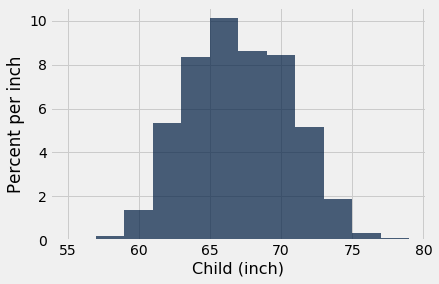

In [6]:
heights.hist(1, bins = np.arange(55, 80, 2), unit = 'inch')

In [7]:
#calculate the area of the 65-67 bar (percentage of individuals in this bar)

width = 67 - 65
height = 10.1

percentage = height * width
percentage

20.2

In [10]:
100 * heights.where('Child', are.between(65, 67)).num_rows / heights.num_rows

20.235546038543898

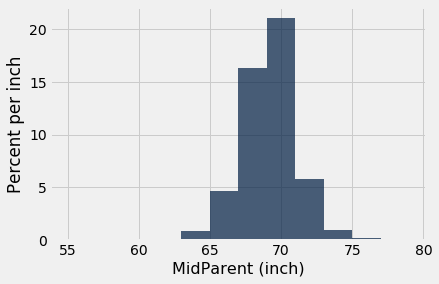

In [11]:
heights.hist(0, bins = np.arange(55, 80, 2), unit = "inch")

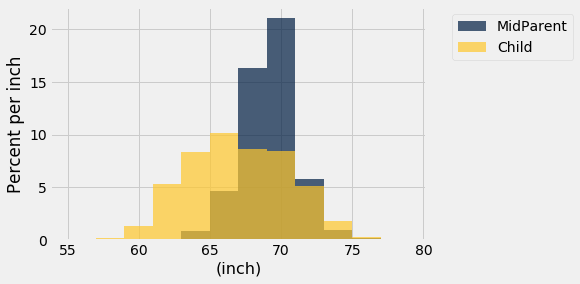

In [13]:
heights.hist(bins = np.arange(55, 80, 2), unit = "inch")

In [14]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


## Functions ##

In [49]:
def double(num):
    twice = num * 2
    return twice

In [50]:
double(10)

20

In [35]:
double(heights)

TypeError: unsupported operand type(s) for *: 'Table' and 'int'

In [36]:
double(make_array(1,2,3))

array([2, 4, 6])

In [37]:
double(2.5)

5.0

In [42]:
x = 2.5
double(x)

5.0

In [45]:
num = 10
double(num)

20

In [46]:
num 

10

In [55]:
def mul(num1, num2):
    return num1 * num2

In [56]:
mul(3, 4)

12

In [57]:
def percents(values):
    return np.round(values/sum(values) * 100, 2)

In [60]:
percents(make_array(1, 2, 3, 4))

array([ 10.,  20.,  30.,  40.])

In [61]:
percents(make_array(1, 2, 3, 43))

array([  2.04,   4.08,   6.12,  87.76])

In [68]:
def percents(values, places = 2):
    return np.round(values/sum(values) * 100, places)

In [72]:
percents(make_array(1,2,3,43), 4)

array([  2.0408,   4.0816,   6.1224,  87.7551])

In [74]:
1 / (1+2+3+43) * 100 

2.0408163265306123

## Apply ##

In [75]:
ages = Table().with_column(
    'Person', make_array('A', 'B', 'C', 'D'),
    'Age', make_array(63, 110, 99, 102)
)

In [76]:
ages

Person,Age
A,63
B,110
C,99
D,102


In [77]:
def cut_off(age):
    return min(age, 100)

In [80]:
ages.apply(cut_off, 'Age')

array([ 63, 100,  99, 100])

In [81]:
age_with_cutoffs = ages.with_column('Age (Cutoff)', ages.apply(cut_off, 'Age'))
age_with_cutoffs

Person,Age,Age (Cutoff)
A,63,63
B,110,100
C,99,99
D,102,100


In [82]:
def difference_of_cutoff(arr):
    return arr.item(1) - arr.item(2)

In [83]:
age_with_cutoffs.apply(difference_of_cutoff)

array([ 0, 10,  0,  2])

In [ ]:
s

## Prediction ##

In [ ]:
heights

In [ ]:
heights.scatter(0, 1)

In [ ]:
heights.scatter(0, 1)
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);